# Data preprocessing

1. Tidy data in Python
2. Data cleaning

## 1. Tidy Data in Python
by [Jean-Nicholas Hould](http://www.jeannicholashould.com/)

In [1]:
import pandas as pd
import numpy as np
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re
import matplotlib.pyplot as plt

### Column headers are values, not variable names

#### Pew Research Center Dataset

In [2]:
df = pd.read_csv("pew-raw.csv")
df.head(10)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


In [3]:
formatted_df = pd.melt(df,["religion"], var_name="income", value_name="freq")
formatted_df = formatted_df.sort_values(by=["religion"])
formatted_df.head(10)

,religion,income,freq
0,Agnostic,<$10k,27
30,Agnostic,$30-40k,81
40,Agnostic,$40-50k,76
50,Agnostic,$50-75k,137
10,Agnostic,$10-20k,34
20,Agnostic,$20-30k,60
41,Atheist,$40-50k,35
21,Atheist,$20-30k,37
11,Atheist,$10-20k,27
31,Atheist,$30-40k,52


#### Billboard Top 100 Dataset

In [4]:
df = pd.read_csv("billboard.csv", encoding="mac_latin2")
df.head(10)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Melting
id_vars = ["year","artist.inverted","track","time","genre","date.entered","date.peaked"]
df = pd.melt(frame=df,id_vars=id_vars, var_name="week", value_name="rank")

df.head(10)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,x1st.week,59.0
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,x1st.week,83.0
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,x1st.week,63.0
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,x1st.week,77.0
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,x1st.week,81.0


In [6]:
# Formatting 
df["week"] = df['week'].str.extract('(\d+)', expand=False)

# Cleaning out unnecessary rows
df = df.dropna(axis=0)

# Create "date" columns
df['date'] = pd.to_datetime(df['date.entered']) + pd.to_timedelta(df['week'], unit='w') - pd.DateOffset(weeks=1)
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0,2000-09-16 00:00:00.000000001
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0,2000-02-05 00:00:00.000000001
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0,1999-10-16 00:00:00.000000001
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0,2000-08-05 00:00:00.000000001
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0,2000-07-29 00:00:00.000000001


In [7]:
df = df[["year", "artist.inverted", "track", "time", "genre", "week", "rank", "date"]]
df = df.sort_values(ascending=True, by=["year","artist.inverted","track","week","rank"])

# Assigning the tidy dataset to a variable for future usage
billboard = df

df.head(10)

,year,artist.inverted,track,time,genre,week,rank,date
246,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,1,87.0,2000-02-19 00:00:00.000000001
563,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2,82.0,2000-02-19 00:00:00.000000002
880,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,3,72.0,2000-02-19 00:00:00.000000003
1197,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,4,77.0,2000-02-19 00:00:00.000000004
1514,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,5,87.0,2000-02-19 00:00:00.000000005
1831,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,6,94.0,2000-02-19 00:00:00.000000006
2148,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,7,99.0,2000-02-19 00:00:00.000000007
287,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,1,91.0,2000-08-26 00:00:00.000000001
604,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2,87.0,2000-08-26 00:00:00.000000002
921,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,3,92.0,2000-08-26 00:00:00.000000003


### Multiple types in one table

In [8]:
songs_cols = ["year", "artist.inverted", "track", "time", "genre"]
songs = billboard[songs_cols].drop_duplicates()
songs = songs.reset_index(drop=True)
songs["song_id"] = songs.index
songs.head(10)

,year,artist.inverted,track,time,genre,song_id
0,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,0
1,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,1
2,2000,3 Doors Down,Kryptonite,3:53,Rock,2
3,2000,3 Doors Down,Loser,4:24,Rock,3
4,2000,504 Boyz,Wobble Wobble,3:35,Rap,4
5,2000,98°,Give Me Just One Night (Una Noche),3:24,Rock,5
6,2000,A*Teens,Dancing Queen,3:44,Pop,6
7,2000,Aaliyah,I Don't Wanna,4:15,Rock,7
8,2000,Aaliyah,Try Again,4:03,Rock,8
9,2000,"Adams, Yolanda",Open My Heart,5:30,Gospel,9


In [9]:
ranks = pd.merge(billboard, songs, on=["year","artist.inverted", "track", "time", "genre"])
ranks = ranks[["song_id", "date","rank"]]
ranks.head(10)

,song_id,date,rank
0,0,2000-02-19 00:00:00.000000001,87.0
1,0,2000-02-19 00:00:00.000000002,82.0
2,0,2000-02-19 00:00:00.000000003,72.0
3,0,2000-02-19 00:00:00.000000004,77.0
4,0,2000-02-19 00:00:00.000000005,87.0
5,0,2000-02-19 00:00:00.000000006,94.0
6,0,2000-02-19 00:00:00.000000007,99.0
7,1,2000-08-26 00:00:00.000000001,91.0
8,1,2000-08-26 00:00:00.000000002,87.0
9,1,2000-08-26 00:00:00.000000003,92.0


### Multiple variables stored in one column

#### Tubercolosis Example

A few notes on the raw data set:

- The columns starting with "m" or "f" contain multiple variables: 
    - Sex ("m" or "f")
    - Age Group ("0-14","15-24", "25-34", "45-54", "55-64", "65", "unknown")
- Mixture of 0s and missing values("NaN"). This is due to the data collection process and the distinction is important for this dataset.

In [10]:
df = pd.read_csv("tb-raw.csv")
df

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014
0,AD,2000,0.0,0.0,1.0,0.0,0,0,0.0,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5,12,10.0,NaN,3.0
2,AF,2000,52.0,228.0,183.0,149.0,129,94,80.0,NaN,93.0
3,AG,2000,0.0,0.0,0.0,0.0,0,0,1.0,NaN,1.0
4,AL,2000,2.0,19.0,21.0,14.0,24,19,16.0,NaN,3.0
5,AM,2000,2.0,152.0,130.0,131.0,63,26,21.0,NaN,1.0
6,AN,2000,0.0,0.0,1.0,2.0,0,0,0.0,NaN,0.0
7,AO,2000,186.0,999.0,1003.0,912.0,482,312,194.0,NaN,247.0
8,AR,2000,97.0,278.0,594.0,402.0,419,368,330.0,NaN,121.0
9,AS,2000,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN


In [11]:
df = pd.melt(df, id_vars=["country","year"], value_name="cases", var_name="sex_and_age")
df.head(10)

,country,year,sex_and_age,cases
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0
5,AM,2000,m014,2.0
6,AN,2000,m014,0.0
7,AO,2000,m014,186.0
8,AR,2000,m014,97.0
9,AS,2000,m014,NaN


In [12]:
# Extract Sex, Age lower bound and Age upper bound group
tmp_df = df["sex_and_age"].str.extract("(\D)(\d+)(\d{2})", expand=False)    

# Name columns
tmp_df.columns = ["sex", "age_lower", "age_upper"]

# Create `age`column based on `age_lower` and `age_upper`
tmp_df["age"] = tmp_df["age_lower"] + "-" + tmp_df["age_upper"]

tmp_df.head(10)

,sex,age_lower,age_upper,age
0,m,0,14,0-14
1,m,0,14,0-14
2,m,0,14,0-14
3,m,0,14,0-14
4,m,0,14,0-14
5,m,0,14,0-14
6,m,0,14,0-14
7,m,0,14,0-14
8,m,0,14,0-14
9,m,0,14,0-14


In [13]:
# Merge 
df = pd.concat([df, tmp_df], axis=1)

# Drop unnecessary columns and rows
df = df.drop(['sex_and_age',"age_lower","age_upper"], axis=1)
df = df.dropna()
df = df.sort_values(ascending=True,by=["country", "year", "sex", "age"])
df.head(10)

,country,year,cases,sex,age
0,AD,2000,0.0,m,0-14
10,AD,2000,0.0,m,15-24
20,AD,2000,1.0,m,25-34
30,AD,2000,0.0,m,35-44
40,AD,2000,0.0,m,45-54
50,AD,2000,0.0,m,55-64
81,AE,2000,3.0,f,0-14
1,AE,2000,2.0,m,0-14
11,AE,2000,4.0,m,15-24
21,AE,2000,4.0,m,25-34


### Variables are stored in both rows and columns

#### Global Historical Climatology Network Dataset

In [14]:
df = pd.read_csv("weather-raw.csv")
df

,id,year,month,element,d1,d2,d3,d4,d5,d6,d7,d8
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = pd.melt(df, id_vars=["id", "year","month","element"], var_name="day_raw")
df.head(10)

,id,year,month,element,day_raw,value
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
5,MX17004,2010,3,tmin,d1,NaN
6,MX17004,2010,4,tmax,d1,NaN
7,MX17004,2010,4,tmin,d1,NaN
8,MX17004,2010,5,tmax,d1,NaN
9,MX17004,2010,5,tmin,d1,NaN


In [16]:
# Extracting day
df["day"] = df["day_raw"].str.extract("d(\d+)", expand=False)  
df["id"] = "MX17004"

# To numeric values
df[["year","month","day"]] = df[["year","month","day"]].apply(lambda x: pd.to_numeric(x, errors='ignore'))
df.head(10)

,id,year,month,element,day_raw,value,day
0,MX17004,2010,1,tmax,d1,NaN,1
1,MX17004,2010,1,tmin,d1,NaN,1
2,MX17004,2010,2,tmax,d1,NaN,1
3,MX17004,2010,2,tmin,d1,NaN,1
4,MX17004,2010,3,tmax,d1,NaN,1
5,MX17004,2010,3,tmin,d1,NaN,1
6,MX17004,2010,4,tmax,d1,NaN,1
7,MX17004,2010,4,tmin,d1,NaN,1
8,MX17004,2010,5,tmax,d1,NaN,1
9,MX17004,2010,5,tmin,d1,NaN,1


In [17]:
# Creating a date from the different columns
def create_date_from_year_month_day(row):
    return datetime.datetime(year=row["year"], month=int(row["month"]), day=row["day"])

df["date"] = df.apply(lambda row: create_date_from_year_month_day(row), axis=1)
df = df.drop(['year',"month","day", "day_raw"], axis=1)
df = df.dropna()
df.head(10)

,id,element,value,date
12,MX17004,tmax,27.3,2010-02-02
13,MX17004,tmin,14.4,2010-02-02
22,MX17004,tmax,24.1,2010-02-03
23,MX17004,tmin,14.4,2010-02-03
44,MX17004,tmax,32.1,2010-03-05
45,MX17004,tmin,14.2,2010-03-05


In [18]:
# Unmelting column "element"
df = df.pivot_table(index=["id","date"], columns="element", values="value")
df.reset_index(drop=False, inplace=True)
df

element,id,date,tmax,tmin
0,MX17004,2010-02-02,27.3,14.4
1,MX17004,2010-02-03,24.1,14.4
2,MX17004,2010-03-05,32.1,14.2


## 2. Data Preprocessing

### Missing values

We use the wheat data set from F-04. We start by reading in the data.

In [19]:
prices_pd = pd.read_csv("Wheat_Price.csv", parse_dates=[-1])
prices_pd.shape

(22899, 8)

Check if there are missing values.

In [20]:
pd.isnull(prices_pd)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [21]:
pd.isnull(prices_pd).values.ravel().sum()

10557

In [22]:
pd.isnull(prices_pd).sum()

State         0
HighQ         0
HighQN        0
MedQ          0
MedQN         0
LowQ      10557
LowQN         0
date          0
dtype: int64

We have a choice to remove all the missing values from the dataframe like so

In [25]:
prices_nona=prices_pd.dropna(axis=0,how='any')
prices_nona.shape

(12342, 8)

Or impute the missing values

In [26]:
prices_filled=prices_pd.fillna(0)
pd.isnull(prices_filled).sum()

State     0
HighQ     0
HighQN    0
MedQ      0
MedQN     0
LowQ      0
LowQN     0
date      0
dtype: int64

In [27]:
prices_pd['LowQ'].fillna(prices_pd['LowQ'].mean())

0        149.490000
1        388.580000
2        189.450000
3        125.870000
4        192.920000
5        213.500000
6        257.360000
7        199.880000
8        213.720000
9        158.260000
10       153.450000
11       160.460000
12       132.610000
13       181.250000
14       154.050000
15       252.240000
16       124.270000
17       120.310000
18       153.730000
19       214.800000
20       734.650000
21       142.990000
22       231.080000
23       561.050000
24       225.620000
25        63.700000
26       190.380000
27       152.090000
28       269.550000
29       168.870000
            ...    
22869    203.747847
22870    203.747847
22871    203.747847
22872    203.747847
22873    203.747847
22874    203.747847
22875    203.747847
22876    203.747847
22877    203.747847
22878    203.747847
22879    203.747847
22880    203.747847
22881    203.747847
22882    203.747847
22883    203.747847
22884    203.747847
22885    203.747847
22886    203.747847
22887    203.747847


There are also methods to impute missing values in the `scikit-learn` library

In [28]:
from sklearn.impute import SimpleImputer
df = pd.DataFrame([["a", "x"],
                    [np.nan, "y"],
                    ["a", np.nan],
                    ["b", "y"]], dtype="category")

imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


In [ ]:
prices_pd = pd.read_csv("Wheat_Price.csv", parse_dates=[-1])
imp = SimpleImputer(strategy = "mean")
imp.fit_transform(prices_pd['LowQ'].values.reshape(-1,1))

### Outliers

Load dataset with housing prices in Boston

In [29]:
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
print(x.shape)

(506, 13)


In [30]:
columns = boston.feature_names
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Visual detection of univariate ourliers with boxplots

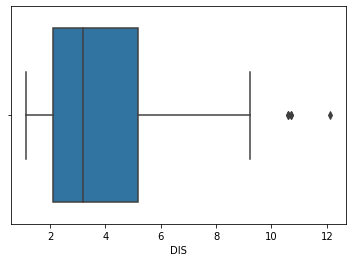

In [31]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

Visual detection of multivariate outliers with scatterplot

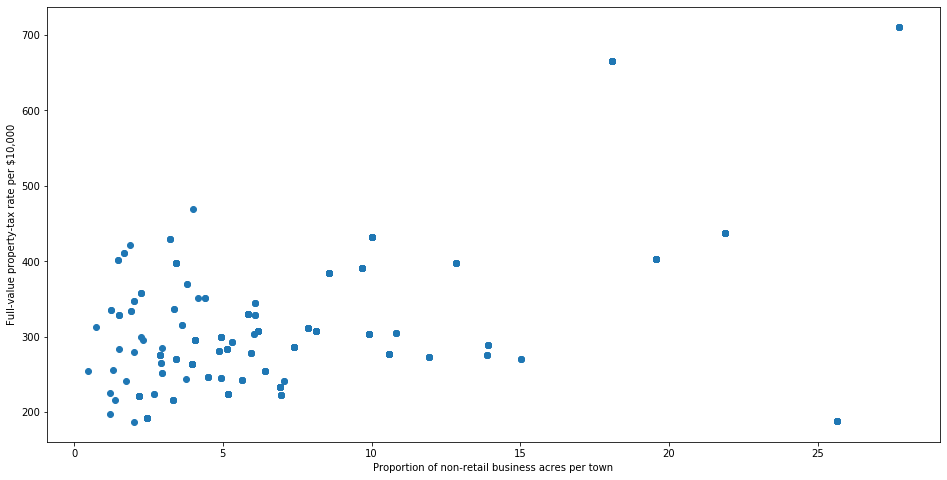

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

#### Check outliers with z-scores
Compute the z-scores

In [33]:
from scipy import stats
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


Find the z-scores that are below -3 and above 3. Note that in the output, the first array contains the list of row numbers and second array respective column numbers.

In [34]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

We check obervation in row 55 and column 1, which should be an outlier

In [35]:
print(z[55][1])

3.375038763517309


Remove outliers based on z-score

In [36]:
boston_df_o1 = boston_df[(z < 3).all(axis=1)]
boston_df_o1.shape

(415, 13)

#### Check outliers with IQR
Start by computing the IQR for each variable.

In [37]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


Check which observations are outliers

In [38]:
(boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


Remove outliers based on IQR.

In [39]:
boston_df_o2 = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_o2.shape

(274, 13)

In [40]:
boston_df_o2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


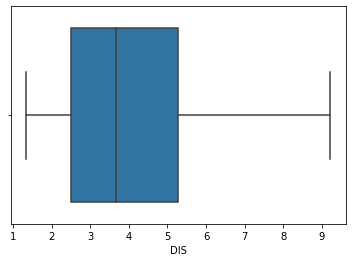

In [41]:
sns.boxplot(x=boston_df_o2['DIS'])

### Standardize 

In [42]:
print('Mean before standardizing: ', boston_df_o2['CRIM'].mean())
print('Standard deviation before standardizing: ',boston_df_o2['CRIM'].std())
print('minimumn before standardizing: ',boston_df_o2['CRIM'].min())
print('maximum before standardizing: ',boston_df_o2['CRIM'].max())

Mean before standardizing:  1.0291742335766425
Standard deviation before standardizing:  1.9558938687010354
minimumn before standardizing:  0.00632
maximum before standardizing:  8.71675


#### Min/Max scaler

In [43]:
scaledVariable=(boston_df_o2['CRIM']-min(boston_df_o2['CRIM']))/(max(boston_df_o2['CRIM'])-min(boston_df_o2['CRIM']))
print('Mean with Min/Max scaling: ', scaledVariable.mean())
print('Standard deviation with Min/Max scaling: ',scaledVariable.std())
print('minimum with Min/Max scaling: ',scaledVariable.min())
print('maximum with Min/Max scaling: ',scaledVariable.max())
#X_scaled = preprocessing.scale(X_train)

Mean with Min/Max scaling:  0.11742867270348793
Standard deviation with Min/Max scaling:  0.2245461898782306
minimum with Min/Max scaling:  0.0
maximum with Min/Max scaling:  1.0


#### Standardizing

In [44]:
from sklearn import preprocessing
scaledVariable=preprocessing.scale(boston_df_o2['CRIM'])
print('Mean after standardizing: ', scaledVariable.mean())
print('Standard deviation after standardizing: ',scaledVariable.std())

Mean after standardizing:  5.1864433267160596e-17
Standard deviation after standardizing:  1.0


We can also use the the StandardScaler utility class in the preprocessing module. This provides a quick and easy way to perform the following operation on an array-like dataset:

In [ ]:
scaler = preprocessing.StandardScaler().fit(boston_df_o2)
scaler

In [ ]:
scaler.mean_

In [ ]:
X_scaled = scaler.transform(boston_df_o2)
X_scaled

### Encoding categorical variables
Converting categorical features to integer codes.

In [ ]:
# Ordinal encoder
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox'],['male', 'from Asia', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari']])

In [ ]:
# One-Hot encoder
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari'],
                ['male', 'from Europe', 'uses Safari']]).toarray()

### Discretization
Changing numerical features to categorical

In [ ]:
X = np.array([[ -3., 5., 15 ],
               [  0., 6., 14 ],
               [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)

In [ ]:
est.transform(X)                      

In [ ]:
bins = [0, 1, 13, 20, 60, np.inf]
labels = ['infant', 'kid', 'teen', 'adult', 'senior citizen']
transformer = preprocessing.FunctionTransformer(
     pd.cut, kw_args={'bins': bins, 'labels': labels, 'retbins': False}
 )
X = np.array([0.2, 2, 15, 25, 97])
transformer.fit_transform(X)